In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
big_df = pd.read_csv('38,102,104, 84.csv')

In [2]:
big_df.columns

Index(['circuit_uuid', 'exp_id', 'run_uuid', 'chip_id', 'chip_ver', 'chip_idx',
       'cir_idx', 'cir_ver', 'cir_vers', 'overall_idx', 'curated',
       'media_conc', 'dry', 'antibiotic', 'atc_code', 'sample_type',
       'contrival', 'sample_prep', 'sample_prep_ver', 'specimen', 'strain_id',
       'strain_conc', 'txid', 'fatal', 'nonfatal', 'intv', 'reaction',
       'fill_type', 'fill_ver', 'operator', 'started', 'instrument', 'run_id',
       'imported', 'date', 'antibiotic_conc', 'cir_col', 'cir_row', 'cir_side',
       'test_module', 'position', 'doublets', 'excluded', 'fill_factor_final',
       'fill_factor_initial', 'included', 'neg', 'neg_0', 'neg_1', 'pos_0',
       'pos_0_inc', 'pos_1', 'pos_1_inc', 'total_droplets'],
      dtype='object')

In [3]:
smallish_df = big_df[['specimen','reaction','fill_factor_final','fill_factor_initial','doublets','total_droplets']]
smallish_df.head()

,specimen,reaction,fill_factor_final,fill_factor_initial,doublets,total_droplets
0,LR-S007-0528,NK-R38,1.0,1.0,57,23135
1,LR-S007-0528,NK-R38,1.0,1.0,48,22031
2,LR-S007-0528,NK-R38,1.0,1.0,34,24168
3,LR-S007-0528,NK-R38,1.0,1.0,42,21581
4,LR-S007-0528,NK-R38,1.0,1.0,51,23102


- R102 and R104 come from the same lot (different bottles)
- Variance is accounted for by imperfections in manufacturing
- R38 is really great, but that lot is sold out
- R84 is adequate, but barely.

In [4]:
r38_df = smallish_df[smallish_df['reaction'] == 'NK-R38']
r84_df = smallish_df[smallish_df['reaction'] == 'NK-R84']
r102_df = smallish_df[smallish_df['reaction'] == 'NK-R102']
r104_df = smallish_df[smallish_df['reaction'] == 'NK-R104']

group38 = r38_df.groupby('specimen')
group84 = r84_df.groupby('specimen')
group102 = r102_df.groupby('specimen')
group104 = r104_df.groupby('specimen')

plot38_df = pd.DataFrame(group38.mean(numeric_only=True)['doublets'])
plot84_df = pd.DataFrame(group84.mean(numeric_only=True)['doublets'])
plot102_df = pd.DataFrame(group102.mean(numeric_only=True)['doublets'])
plot104_df = pd.DataFrame(group104.mean(numeric_only=True)['doublets'])

merge1 = pd.merge(plot38_df,plot84_df,how='inner',on='specimen',suffixes=['_38','_84'])
merge2 = pd.merge(plot102_df,plot104_df,how='inner',on='specimen',suffixes=['_102','_104'])
doublets_df = pd.merge(merge1,merge2,how='inner',on='specimen')
doublets_df.rename(axis=1,mapper={'doublets_38':'NK-R38','doublets_84':'NK-R84',\
                                  'doublets_102':'NK-R102','doublets_104':'NK-R104'},inplace=True)

doublets_df.head()


,NK-R38,NK-R84,NK-R102,NK-R104
specimen,,,,
LR-S002-1321,33.400000,35.0,33.8,30.2
LR-S003-0259,59.200000,112.7,35.3,46.0
LR-S003-0261,100.900000,131.8,93.8,110.9
LR-S007-0523,43.666667,52.8,48.6,39.5
LR-S007-0524,41.000000,85.1,47.6,39.8


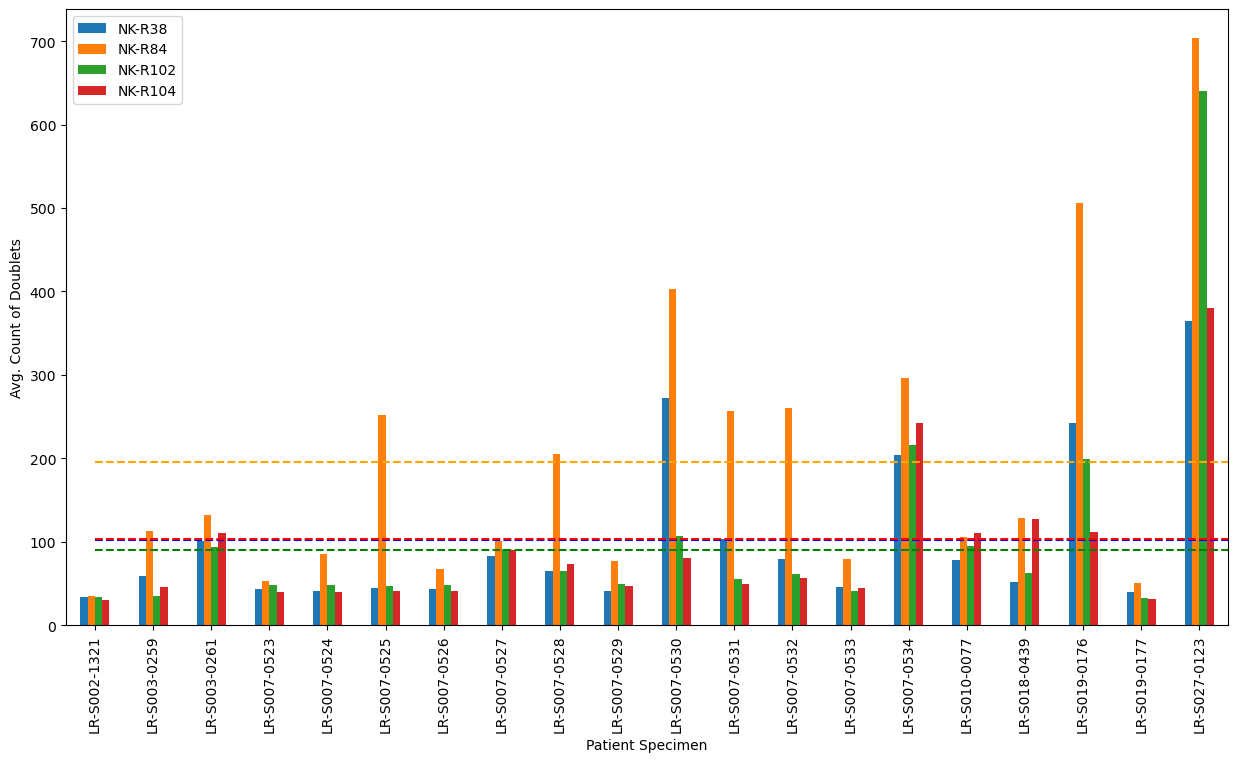

In [5]:
doublets_df.plot(kind='bar',figsize=(15,8),ylabel='Avg. Count of Doublets',xlabel='Patient Specimen')
plt.hlines(doublets_df['NK-R38'].mean(),0,20,colors='blue',linestyles='--')
plt.hlines(doublets_df['NK-R84'].mean(),0,20,colors='orange',linestyles='--')
plt.hlines(doublets_df['NK-R104'].mean(),0,20,colors='green',linestyles='--')
plt.hlines(doublets_df['NK-R102'].mean(),0,20,colors='red',linestyles='--')

<Axes: >

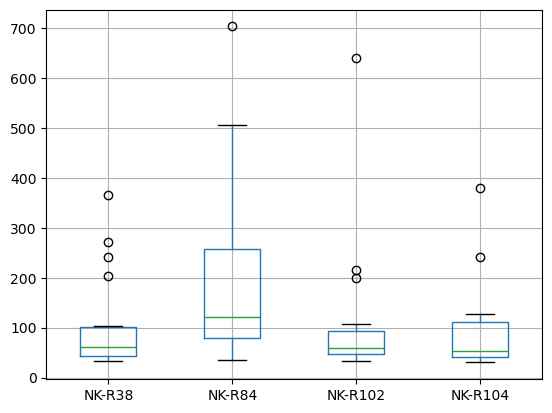

In [6]:
doublets_df.boxplot()